# Data loading (part 0)

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("cal-housing.csv")

# Data visualization (part 1)

In [4]:
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
row, col = dataset.shape
print(row, col)

20640 10


### Longitude

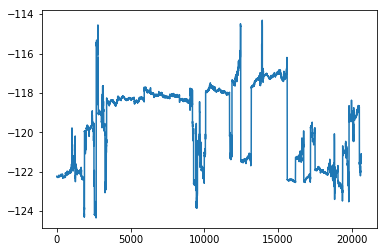

In [9]:
plt.plot(dataset["longitude"])
plt.show()

In [12]:
min(dataset["longitude"]), max(dataset["longitude"])

(-124.35, -114.31)

### Latitude

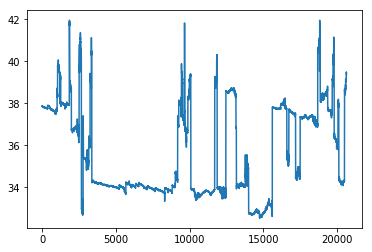

In [14]:
plt.plot(dataset["latitude"])
plt.show()

In [15]:
min(dataset["latitude"]), max(dataset["latitude"])

(32.54, 41.95)

### Housing median age

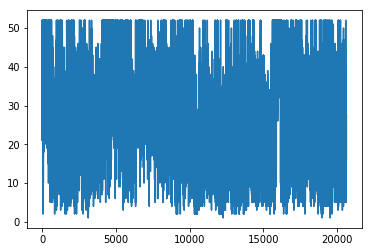

In [17]:
plt.plot(dataset["housing_median_age"])
plt.show()

In [18]:
min(dataset["housing_median_age"]), max(dataset["housing_median_age"])

(1.0, 52.0)

### Total rooms

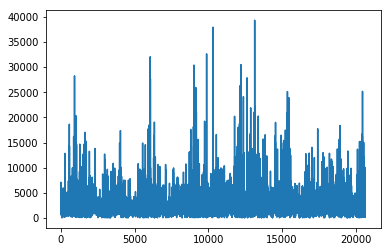

In [19]:
plt.plot(dataset["total_rooms"])
plt.show()

In [20]:
min(dataset["total_rooms"]), max(dataset["total_rooms"])

(2.0, 39320.0)

### Total bedrooms

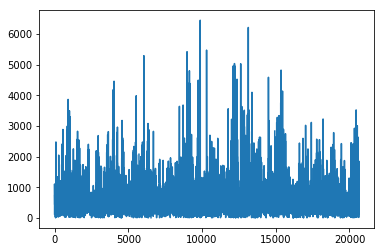

In [21]:
plt.plot(dataset["total_bedrooms"])
plt.show()

In [22]:
min(dataset["total_bedrooms"]), max(dataset["total_bedrooms"])

(1.0, 6445.0)

### Population

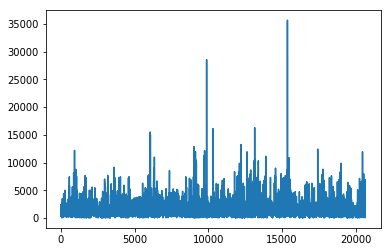

In [23]:
plt.plot(dataset["population"])
plt.show()

In [24]:
min(dataset["population"]), max(dataset["population"])

(3.0, 35682.0)

### Households

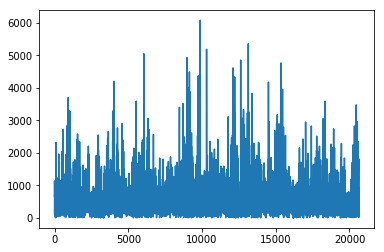

In [25]:
plt.plot(dataset["households"])
plt.show()

In [26]:
min(dataset["households"]), max(dataset["households"])

(1.0, 6082.0)

### Median income

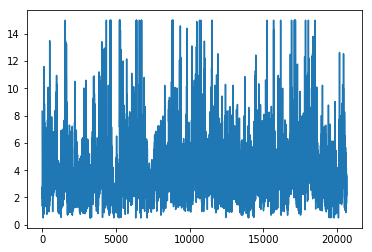

In [27]:
plt.plot(dataset["median_income"])
plt.show()

In [28]:
min(dataset["median_income"]), max(dataset["median_income"])

(0.4999, 15.0001)

### Median house value

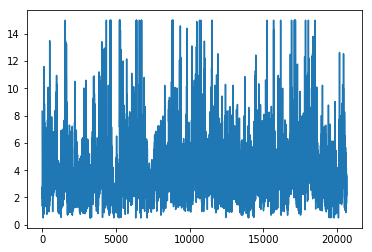

In [29]:
plt.plot(dataset["median_income"])
plt.show()

In [31]:
min(dataset["median_house_value"]), max(dataset["median_house_value"])

(14999.0, 500001.0)

### Ocean proximity

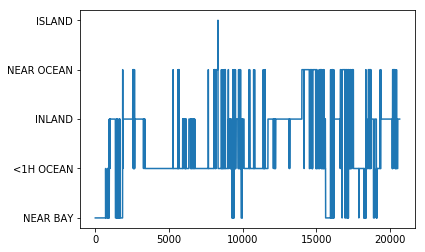

In [32]:
plt.plot(dataset["ocean_proximity"])
plt.show()

In [35]:
dataset["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Preprocessing and Data Wrangling (part 2)

Which kind of preprocessing can we perform? How much?

 <img src="images/table_preprocessing.png">

## Duplicate removal

In [36]:
len(dataset)

20640

In [37]:
dataset = dataset.drop_duplicates()
len(dataset)

20640

Fortunately, in this dataset there are no duplicates

## Noise removal

In order to handle the presence of outliers, normalization will be effective, on the other hand there are missing values

In [44]:
dataset.isnull().values.any()

True

In [69]:
col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

for i in col:
    print(i + ": ", dataset[i].isnull().values.any())

longitude:  False
latitude:  False
housing_median_age:  False
total_rooms:  False
total_bedrooms:  True
population:  False
households:  False
median_income:  False
median_house_value:  False
ocean_proximity:  False


In [47]:
dataset[dataset.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


## (optional) Data augmentation?

In [ ]:
## we may consider to augment data if the dataset is not enough rich of examples

## Normalization

# Ridge Regression (part 3)

# Dependence of the cross-validated risk estimate on the parameter alpha (part 4)

# PCA (part 5)

# optional: try nested CV to avoid choosing alpha (part 6)